# Noise in Phase Field Models
## Vera Titze Undergraduate Research Report Spring 2019

## I. Brownian Motion and Langevin Equations

The fluctuation dissipation theorem states that the expected noise $\eta$ in the phase field and in the concentration behave according to the following equations:
$$\left\langle\eta_{\psi}(\vec{x}, t) \eta_{\psi}(\vec{x}', t')\right\rangle= 2 \Gamma_{\psi} k_{b} T \delta(\vec{x}-\vec{x}') \delta(t-t')$$
$$\left\langle\eta_{c}(\vec{x}, t) \eta_{c}(\vec{x}', t')\right\rangle=2 \Gamma_{c} k_{b} T \nabla^{2} \delta(\vec{x}-\vec{x}') \delta(t-t')$$
Since $\left\langle\eta_{\psi}(\vec{x}, t)\right\rangle=0$ and $\left\langle\eta_{c}(\vec{x}, t)\right\rangle=0$ from the assumption that the statistical distribution of motion is centered about zero, the standard deviation of each noise term is equal to the square root RHS in each of the above equations. This follows from the general formula of the standard deviation:
$$\sigma^2=var(x)=\left\langle x^2\right\rangle-\left\langle x\right\rangle^2$$ for the case when $\vec{x}=\vec{x}'$ and $t=t'$, equivalent to one specific cell at one single timestep, independent of the cells around and the previous timestep.
Kosterlitz and Grant [1] proceed to add this noise term outside the functional:
$$ \frac{\partial \psi}{\partial t}=-\Gamma_{\psi} \frac{\delta \mathcal{F}}{\delta \psi}+\eta_{\psi}$$
$$ \frac{\partial c}{\partial t}=\Gamma_{c} \nabla^{2} \frac{\delta \mathcal{F}}{\delta c}+\eta_{c} $$
When incorporating Langevin Noise into a Multicomponent Model, we suspect that this could be an oversimplification, hence both adding the noise inside and outside the functional were investigated and compared.

#### Filling variables with numbers to avoid not defined errors in demonstration

In [1]:
import numpy as np
from scipy.constants import R
from noise_utils import plotImages_c, plotImages
import matplotlib.pyplot as plt
#set up meaningless data to avoid errors
M_A=1
M_B=1
W_C=1
M_phi=1
v_m=7
m=1
dGSdc1=1
dGSdc2=1
dGLdc1=1
dGLdc2=1
g=1
T=np.full((50, 50), 1573)
phi=np.full((50, 50), 0.5)
c1=np.full((50, 50), 0.5)
c2=np.full((50, 50), 0.5)
W_A=np.full((50, 50), 0.5)
W_B=np.full((50, 50), 0.5)
deltaphi=0
deltac1=0
deltac2=0
dt=10**(-5)

### I.I. Adding noise outside the functional
The following code was added (see below). The molar gas constant $R$ was used instad of $k_B$ to be consistent with our formalism of the mobility $M$.

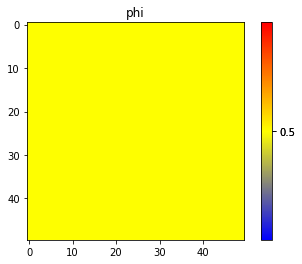

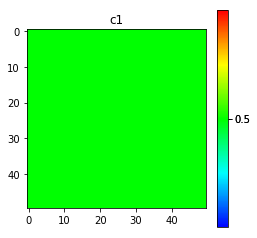

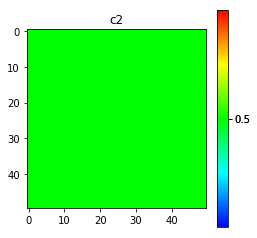

In [2]:
plotImages_c(phi, c1, c2)

In [3]:
#find noise
#standard deviation of noise in phi and c according to Kosterlitz and Grant paper
std_c1=np.absolute(np.sqrt(2*R*M_A*T/v_m))
std_c2=np.absolute(np.sqrt(2*R*M_B*T/v_m))
std_phi=np.absolute(np.sqrt(2*R*M_phi*T/v_m))
#random Gaussian generation via Box-Muller transform
r1=np.random.random((len(phi), len(phi[0])))
r2=np.random.random((len(phi), len(phi[0])))
th=np.random.random((len(phi), len(phi[0])))
#find random motion 
noise_c1_help=np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*th)*std_c1
noise_c2_help=np.sqrt(-2*np.log(r1))*np.sin(2*np.pi*th)*std_c2
#bring into agreement with the energy functional
noise_c1=noise_c1_help-c1*noise_c1_help-c2*noise_c2_help
noise_c2=noise_c2_help-c1*noise_c1_help-c2*noise_c2_help    
noise_phi=np.sqrt(-2*np.log(r2))*np.sin(2*np.pi*th)*std_phi

#apply changes
c1 += (deltac1+noise_c1)*dt
c2 += (deltac2+noise_c2)*dt
phi += (deltaphi+noise_phi)*dt

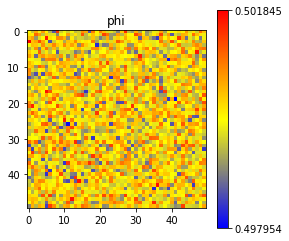

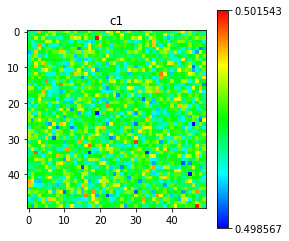

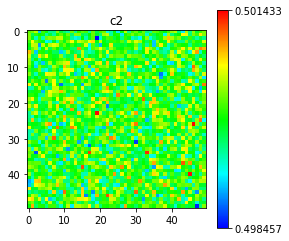

In [4]:
plotImages_c(phi, c1, c2)

### I.II. Adding Noise inside the functional
In this case, the noise in the concentration is added to the change in free energy with respect to concentration:

In [5]:
#standard deviation of noise in phi and c according to Kosterlitz and Grant paper
std_c1=np.sqrt(np.absolute(2*R*T/v_m))
#random Gaussian generation via Box-Muller transform
r1=np.random.random((len(phi), len(phi[0])))
r2=np.random.random((len(phi), len(phi[0])))
th=np.random.random((len(phi), len(phi[0])))
#find random motion 
noise_c1=np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*th)*std_c1
noise_c2=np.sqrt(-2*np.log(r1))*np.sin(2*np.pi*th)*std_c1            

dFdc1 = (dGSdc1 + m*(dGLdc1-dGSdc1))/v_m + (W_A-W_C)*g*T + noise_c1
dFdc2 = (dGSdc2 + m*(dGLdc2-dGSdc2))/v_m + (W_B-W_C)*g*T + noise_c2

### I.III. Results

a) Noise outside the energy functional:
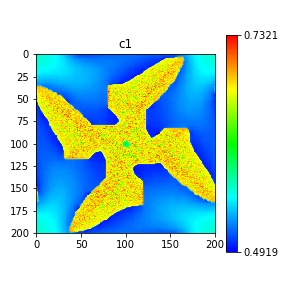
$$ Figure\_1$$

b) Noise inside the functional, same initial conditions and parameters used:
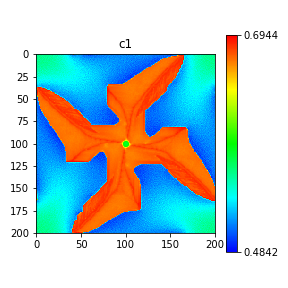
$$Figure\_2$$

## II. Brownian Motion in Spinodal Decomposition in the Context of Diffusion

In [6]:
## My simulation for conserved spinodal decompositon
def simulate(phi, m):
    #initial conditions & parameters
    M=0.25
    epsilon=0.25
    dt=0.025
    dx=1.
    inversexsq=1./(dx*dx)
    laplacian=(np.roll(phi, 1, 0)+np.roll(phi, 1, 1)+np.roll(phi, -1, 0)+np.roll(phi, -1, 1)-4*phi)*inversexsq
    #find difference per timestep
    functional=phi*(2-phi*(6-4*phi))-epsilon*laplacian
    laplace_func=(np.roll(functional, 1, 0)+np.roll(functional, 1, 1)+np.roll(functional, -1, 0)+np.roll(functional, -1, 1)-4*functional)*inversexsq
    deltaphi=M*dt*laplace_func
    #standard deviation of noise and array generation, with a multiplication factor of m
    std=np.sqrt(2*M*m*300) #assume 300Kelvin for temperature
    r=np.random.random((len(phi), len(phi[0])))
    th=np.random.random((len(phi), len(phi[0])))
    noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std*dt
    #update phi with noise
    phinew=phi+deltaphi+noise
    return phinew

### II.I. Demonstrating the Effect of altering Noise Amplitude

new noise multiplication factor:  0.01


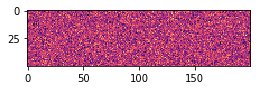

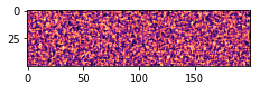

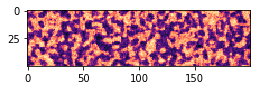

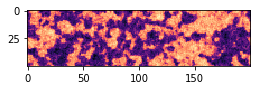

new noise multiplication factor:  0.003162


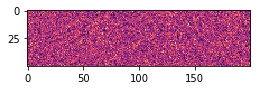

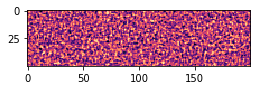

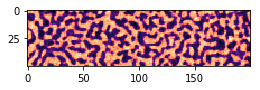

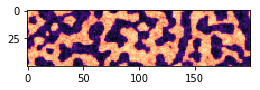

new noise multiplication factor:  0.001


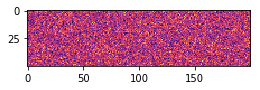

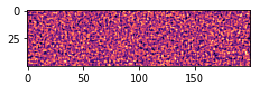

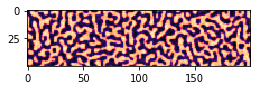

In [ ]:
#create initial blank grid
grid0=np.full((50,200), 0.5)
for i in range (4,8):
    m_i=10**(-i/2)
    print("new noise multiplication factor: ", round(m_i, 6))
    grid=simulate(grid0, m_i)
    #run simulations to compare different noise amplitudes
    for j in range(0,5):
        #only show select steps that are more spaced out as we progress
        for k in range(0, j**7):
            grid=simulate(grid, m_i)
        if (j!=1):
            plt.imshow(grid, cmap='magma')
            plt.show()
                

### II.II. Comparing the Amplitudes of Noise Flux and Flux expected from Diffusion

In [8]:
#===================================== FIND FLUXES 1D CASE ==============================
def find_expected_flux_x(grid, D, dx):
    #according to ficks law of diffusion
    return -D*(np.roll(grid, -1, 0)-np.roll(grid, 1, 0))/(2*dx)

def add_noise(phi, m):
    #use the same approach to find the flux
    std=np.sqrt(2*m*M*300) #assume 300Kelvin for temperature
    r=np.random.random(len(phi))
    th=np.random.random(len(phi))
    noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std
    return phi+noise

def find_time_flux_x(grid, dx, dt, m):
    grid2=add_noise(grid, m)
    return (grid2-grid)*dx/dt

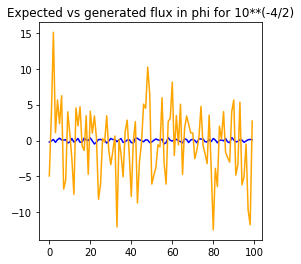

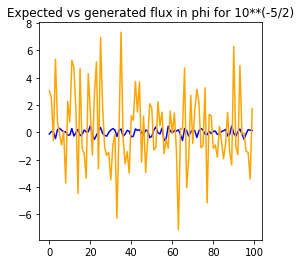

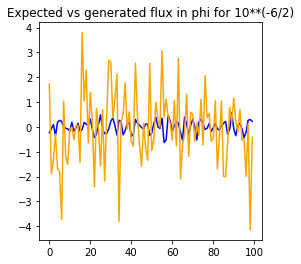

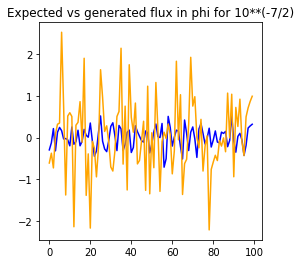

In [9]:
from matplotlib import rc
phi=np.full(100, 0.5)
x=np.arange(0, 100, 1)
j=0
M=0.25

for i in range (4,8):
    m_i=10**(-i/2)
    phi=add_noise(phi, m_i)
    plt.figure()
    plt.plot(x, find_expected_flux_x(phi, 0.25, 1.),label='expected', color='blue')
    plt.plot(x, find_time_flux_x(phi, 1., 0.25, m_i),label='generated', color='orange')
    plt.title('Expected vs generated flux in phi for 10**(-'+ str(i)+'/2)')
    plt.show()

## III. Stochastic Nucleation
This method of randomly introducing nuclei into the phase field is based on the thermodynamic probability of forming a nucleus above the critical number of molecules for stability. The proability follows a Poisson distribution:
The code fragment I developed introduces a nucleus and then increases its radius 

In [10]:
def add_nuclei(phi, J, b, size):
    N=size**2
    #find the Poisson determined cutoff p11
    p11=J/(2*N*b)
    random=np.random.random((size, size))
    comp=random<p11
    #find the center positions of nuclei
    bin0=(np.full((size,size), 1)*comp)
    #increase the size of nuclei
    bin_nuc=np.zeros((size,size))
    a=5
    for i in range(2*a):
        for j in range(2*a):
            if (i**2+j**2)<(a**2):
                bin_nuc+=(np.roll(bin0, (i, j), (0,1))+np.roll(bin0, (-i, j), (0,1))+np.roll(bin0, (i, -j), (0,1))+np.roll(bin0, (-i, -j), (0,1)))
    #re-binarize
    comp=bin_nuc>0
    bin_nuc=(np.full((size,size), 1)*comp)
    phinew=phi-phi*bin_nuc+bin_nuc
    return phinew

The value of J hereby affects the probability to nucleate, as well as the parameter b, which is a scaling factor that assures consistency with time and length scaling used in the model.
### Demonstration for J=5

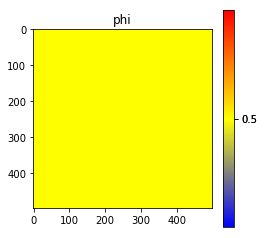

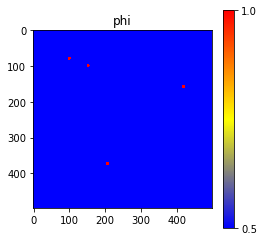

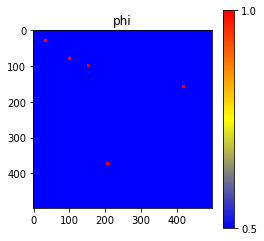

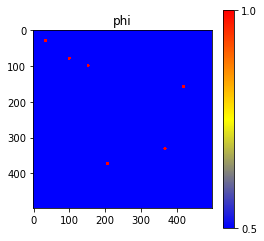

In [11]:
phinew=np.full((500, 500), 0.5)
plotImages(phinew)
for i in range(3):
    phinew=add_nuclei(phinew, 5, 2, 500)
    plotImages(phinew)

## Demonstration for J=20

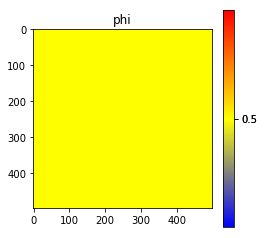

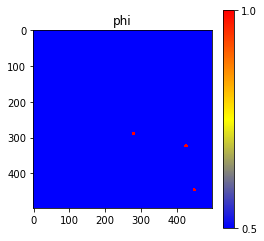

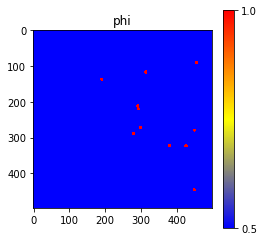

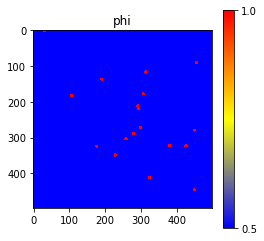

In [12]:
phinew=np.full((500, 500), 0.5)
plotImages(phinew)
for i in range(2):
    phinew=add_nuclei(phinew, 20, 2, 500)
    plotImages(phinew)

## IV. Combined Approach
In the combined approach, every 100 iterations, a nucleation step is included. Executing this code made it obvious that my algorithm for stochastic nucleation is missing the quaternion component and all new nuclei have the same orientation.
### Illustrative example of inserting extra nuclei
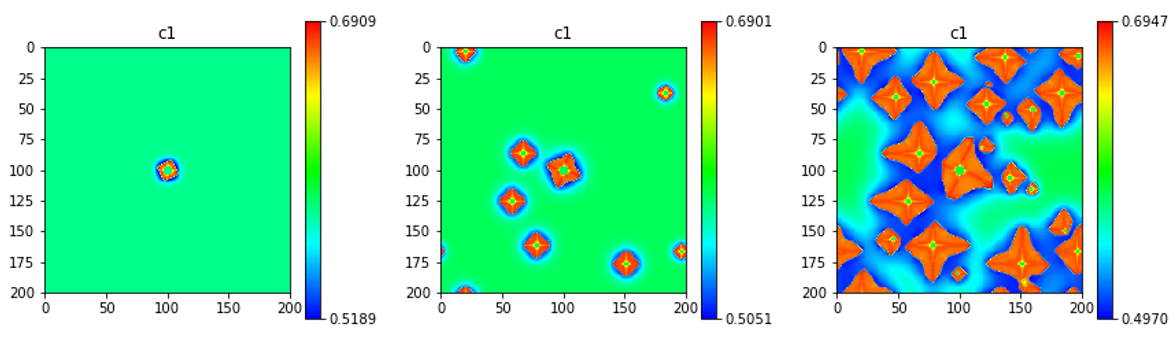
$$ Figure\_3$$

## V. Conclusions and Outlook (\# right now this is a To-Do-List)
- Test and Validate Langevin Model
- Find correct parameters for stochastic nucleation
- Figure out how to modify the quaternion when adding nuclei

## References
http://jeti.uni-freiburg.de/studenten_seminar/term_paper_WS_18_19/Zwanzig01.pdf